# Spectral generator demo

A demo which uses the _generate_spectra_ function from the spectral_generator.py file.
The calibration dataset is loaded in, the model is calibrated, and some datasets are simulated to describe how the function works.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from spectral_generator import generate_spectra

In [2]:
# helper function to plot spectra.
def plot_spectra(X, y):
    X_ = pd.DataFrame(X).copy(deep=True)
    X_.columns = np.arange(0, X.shape[1])
    
    fig = plt.figure(figsize=(12, 8))
    gs = fig.add_gridspec(10, 10)

    ax0 = fig.add_subplot(gs[:5, 1:9])
    ax1 = fig.add_subplot(gs[5:, :5])
    ax2 = fig.add_subplot(gs[5:, 5:])
    
    ax0.plot(X_.T)
    ax1.plot(X_.mean(axis=0))
    ax2.plot(X_.std(axis=0))
    
    ax0.set_title('All spectra')
    ax1.set_title('Mean spectrum')
    ax2.set_title('Standard deviation spectrum')
    ax0.set_ylabel('Absorbance [a.u.]')
    ax1.set_ylabel('Absorbance [a.u.]')
    ax2.set_ylabel('Standard deviation [a.u.]')
    
    for ax in [ax0, ax1, ax2]:
        ax.set_xticks([])
        ax.set_xlabel('Wavenumber [cm$^{-1}$]')
    
    plt.tight_layout()
    plt.show()

## Loading input data 

Spectral data is used for calibrating the model. Data from the lung cancer vs. non-symptomatic controls is used for this demo. Water measurement are loaded in as well to calculate the measurement noise.

### Blood serum spectra

In [3]:
serum_spectra = pd.concat((pd.read_csv('data/dataset_1_part_%s.csv' % f.zfill(2)) for f in np.arange(1, 21).astype(str)), ignore_index=True) # load the cancer and non-cancer spectra from file

In [4]:
X = serum_spectra.iloc[0:100000, 1:] # matrix containing the spectra of lung cancer and control samples. Samples in rows, wavenumers in columns.
X.columns = X.columns.astype(float)

y = serum_spectra.iloc[0:100000, 0] # vector containing the sample labels.
y = y.replace({'lung cancer control': 0, 'lung cancer case': 1})

In [5]:
# sample 2000 spectra from the 100000 spectra (for faster performance).
idx = np.random.choice(np.arange(100000), 2000, replace=False)
X = X.iloc[idx]
y = y.iloc[idx]

In [6]:
display(X)

,1000.816143,1002.742871,1004.669599,1006.596328,1008.523056,1010.449784,1012.376512,1014.303240,1016.229968,1018.156696,...,2981.492634,2983.419362,2985.346091,2987.272819,2989.199547,2991.126275,2993.053003,2994.979731,2996.906459,2998.833187
67699,0.000867,0.001056,0.001292,0.001562,0.001931,0.002269,0.002554,0.002797,0.002979,0.003166,...,0.018905,0.018006,0.017178,0.016368,0.015624,0.014871,0.014272,0.013676,0.013234,0.012841
76599,-0.000539,-0.000232,0.000099,0.000482,0.000871,0.001294,0.001664,0.001953,0.002163,0.002382,...,0.016566,0.015475,0.014400,0.013421,0.012532,0.011671,0.010911,0.010294,0.009720,0.009278
75648,0.000770,0.001039,0.001321,0.001741,0.002194,0.002623,0.002973,0.003280,0.003514,0.003720,...,0.017816,0.016807,0.015837,0.014931,0.014065,0.013263,0.012579,0.012013,0.011496,0.011161
37377,0.000194,0.000453,0.000774,0.001129,0.001576,0.002008,0.002341,0.002671,0.002870,0.003125,...,0.017398,0.016394,0.015441,0.014579,0.013734,0.012953,0.012284,0.011668,0.011168,0.010757
23353,-0.002375,-0.002139,-0.001788,-0.001410,-0.000951,-0.000522,-0.000097,0.000250,0.000523,0.000793,...,0.014366,0.013179,0.011991,0.010889,0.009877,0.008931,0.008066,0.007298,0.006641,0.006080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47665,-0.000792,-0.000623,-0.000361,-0.000060,0.000334,0.000728,0.001042,0.001314,0.001498,0.001653,...,0.016879,0.015840,0.014848,0.013972,0.013054,0.012294,0.011581,0.010963,0.010378,0.009961
95264,-0.000042,0.000225,0.000561,0.000999,0.001520,0.001994,0.002487,0.002836,0.003193,0.003471,...,0.016949,0.015899,0.014895,0.013951,0.013031,0.012262,0.011518,0.010914,0.010364,0.009982
28362,-0.001399,-0.001181,-0.000928,-0.000512,-0.000064,0.000407,0.000822,0.001127,0.001350,0.001567,...,0.016060,0.014868,0.013765,0.012686,0.011707,0.010791,0.009997,0.009288,0.008689,0.008163
84988,-0.000106,0.000076,0.000329,0.000617,0.000979,0.001326,0.001633,0.001845,0.001989,0.002182,...,0.018071,0.017066,0.016142,0.015217,0.014418,0.013674,0.012961,0.012451,0.011990,0.011589


In [7]:
display(y)

67699    1
76599    1
75648    1
37377    0
23353    0
        ..
47665    0
95264    1
28362    0
84988    1
23172    0
Name: target, Length: 2000, dtype: int64

### Water spectra

In [8]:
water_spectra = pd.read_csv('data/dataset_2.csv') # load the mean-subtracted water spectra from file.
water_spectra.columns = water_spectra.columns.astype(float)

In [9]:
display(water_spectra)

,1000.816143,1002.742871,1004.669599,1006.596328,1008.523056,1010.449784,1012.376512,1014.303240,1016.229968,1018.156696,...,2981.492634,2983.419362,2985.346091,2987.272819,2989.199547,2991.126275,2993.053003,2994.979731,2996.906459,2998.833187
0,-3.212814e-06,-3.055689e-06,-2.476283e-06,-1.733656e-06,-7.738353e-07,-3.855593e-07,-1.186729e-06,-1.849676e-06,-1.490719e-06,-1.110812e-06,...,-1.204071e-06,-8.665961e-07,-9.156575e-07,-9.426045e-07,-1.014360e-06,-1.001794e-06,-5.858619e-07,-3.256754e-07,-3.867881e-07,-3.369293e-07
1,-2.530688e-06,-2.185765e-06,-1.757428e-06,-1.593712e-06,-2.194079e-06,-3.011644e-06,-3.546082e-06,-3.435222e-06,-2.481520e-06,-1.653769e-06,...,1.117278e-06,1.672151e-06,2.049984e-06,2.115092e-06,2.394173e-06,2.817683e-06,2.768746e-06,2.436794e-06,2.133048e-06,1.397884e-06
2,-2.703286e-06,-1.653784e-06,1.864061e-08,-1.050924e-07,-1.159687e-06,-2.075248e-06,-2.687166e-06,-2.216935e-06,-1.575374e-06,-1.580571e-06,...,6.801964e-07,8.118190e-07,1.516860e-06,1.913497e-06,2.221770e-06,2.559234e-06,2.157801e-06,1.235194e-06,4.025570e-07,-8.599657e-08
3,-1.116429e-06,-2.392958e-06,-3.407281e-06,-4.126047e-06,-4.297484e-06,-3.896348e-06,-3.329803e-06,-2.368092e-06,-1.605913e-06,-2.168756e-06,...,1.154092e-06,1.102175e-06,8.836039e-07,8.045648e-07,1.006813e-06,1.574977e-06,1.736856e-06,1.413036e-06,1.418150e-06,1.376632e-06
4,-2.966924e-06,-2.684066e-06,-2.068514e-06,-1.821372e-06,-2.410525e-06,-3.303748e-06,-2.983956e-06,-1.502259e-06,-5.978393e-07,-2.721182e-07,...,-5.270270e-07,-2.303793e-07,3.777074e-08,-7.136784e-09,-6.457429e-07,-1.185564e-06,-1.433046e-06,-1.283866e-06,-4.202294e-07,6.083164e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,-3.600196e-07,-1.100939e-06,-2.042994e-06,-1.833621e-06,-2.731207e-07,7.069937e-07,9.433609e-07,4.191681e-08,-2.291458e-06,-4.077113e-06,...,-1.359760e-06,-1.204704e-06,-9.710837e-07,-6.929523e-07,-8.420492e-07,-6.817679e-07,1.313274e-07,2.983087e-07,-3.152188e-07,-6.919225e-07
396,2.706912e-07,1.150386e-06,1.339129e-06,1.558347e-07,-5.229103e-07,4.959198e-08,-2.925586e-07,-8.411041e-07,-4.478697e-07,-4.354949e-07,...,4.335875e-07,4.413871e-07,2.809142e-07,-6.845506e-08,-2.936554e-07,-7.591257e-08,7.612629e-07,1.575449e-06,1.422555e-06,9.579098e-07
397,5.636604e-07,8.715475e-08,-3.272370e-08,5.198307e-07,8.370951e-07,7.981592e-07,5.895422e-07,8.286251e-07,1.426294e-06,1.688136e-06,...,5.455197e-07,9.716769e-08,2.448518e-07,7.694284e-07,1.113765e-06,1.200120e-06,1.207441e-06,1.175824e-06,1.358322e-06,1.980578e-06
398,-1.548109e-06,-8.581850e-07,1.688001e-07,7.153705e-07,1.689560e-07,-9.878476e-07,-2.232104e-06,-2.816621e-06,-1.554120e-06,-9.717523e-10,...,1.617052e-06,2.227781e-06,1.882340e-06,1.256655e-06,9.665970e-07,6.164331e-07,6.448912e-07,1.061978e-06,7.891770e-07,7.669816e-07


## Defining the calibration parameters

Parameters are calculated from the input data and will be given as inputs to the _spectral_generator_ function.

### Calculating the biological properties

In [10]:
mu_neg = X[y==0].mean(axis=0) # mean spectrum of control samples.
mu_pos = X[y==1].mean(axis=0) # mean spectrum of case samples.

B_neg = X[y==0] - mu_neg # calibration vectors for control samples.
B_pos = X[y==1] - mu_pos # calibration vectors for case samples.

### Calculating the measurement noise

In [11]:
epsilon_std = water_spectra.std(axis=0) # standard deviation across the spectral features of the water measurements.
epsilon_std *= 9.15 # scaling factor, to account for the L2 vector normalization in the preprocessing of the sera measurements.

## Generating spectra

#### Creating a dataset of 1000 cases and 1000 controls at the calibrated levels of biological variability and measurement noise. At the calibrated levels, the generated spectra are made to model the same properties as the input calibration measurements.

In [12]:
X_gen, y_gen = generate_spectra(B_neg=B_neg, B_pos=B_pos, 
                                mu_neg=mu_neg, mu_pos=mu_pos, 
                                n_neg=1000, n_pos=1000, 
                                beta_std_neg='auto', beta_std_pos='auto', 
                                epsilon_std=epsilon_std, 
                                random_state=42)

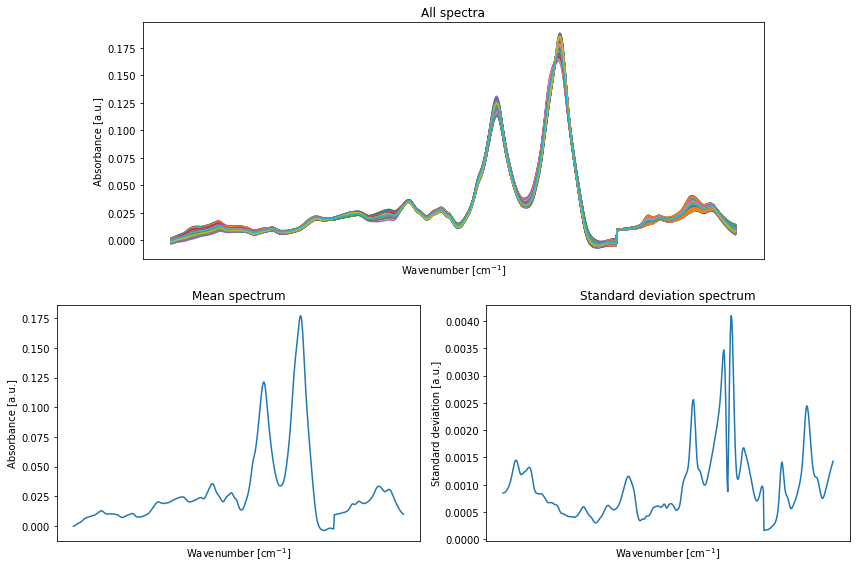

In [13]:
plot_spectra(X_gen, y_gen)

---

#### Creating a dataset of 1000 cases and 1000 controls at a level of biological variability 2 times higher than the calibrated level.

In [14]:
X_gen, y_gen = generate_spectra(B_neg=B_neg, B_pos=B_pos, 
                                mu_neg=mu_neg, mu_pos=mu_pos, 
                                n_neg=1000, n_pos=1000, 
                                beta_std_neg=2/np.sqrt(B_neg.shape[0]), beta_std_pos=2/np.sqrt(B_pos.shape[0]), # higher bio-variability level.
                                epsilon_std=epsilon_std, 
                                random_state=42)

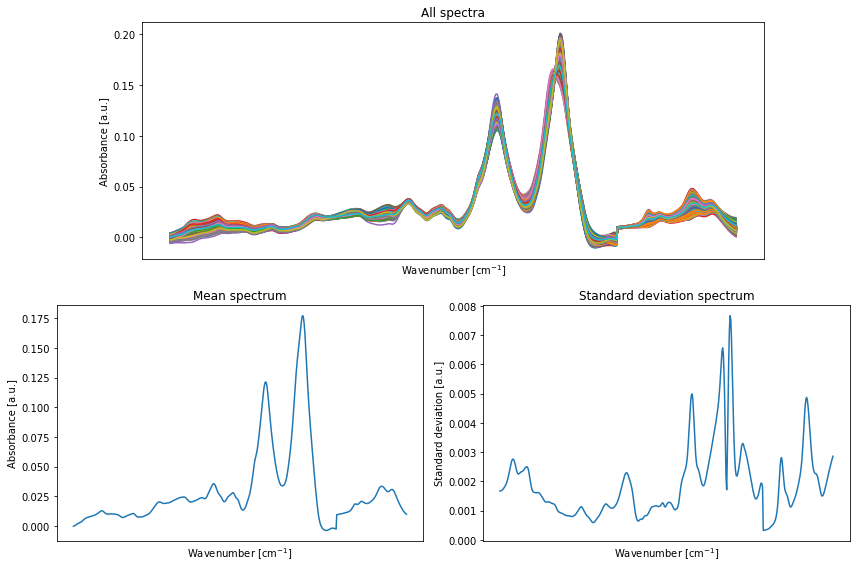

In [15]:
plot_spectra(X_gen, y_gen)

---

#### Creating a dataset of 1000 cases and 1000 controls at a level of measurement noise 100 times higher than the calibrated level.

In [16]:
X_gen, y_gen = generate_spectra(B_neg=B_neg, B_pos=B_pos, 
                                mu_neg=mu_neg, mu_pos=mu_pos, 
                                n_neg=1000, n_pos=1000, 
                                beta_std_neg='auto', beta_std_pos='auto', 
                                epsilon_std=epsilon_std*100, # higher measurement noise level.
                                random_state=42)

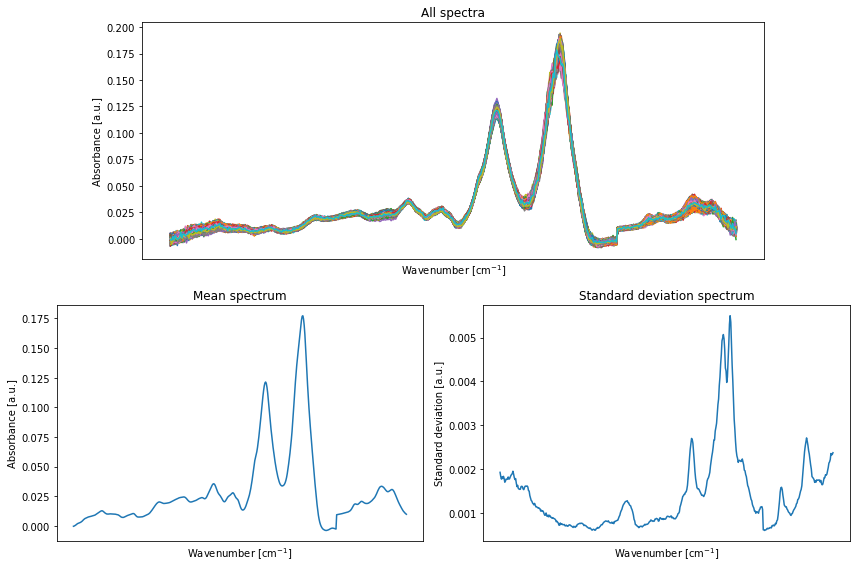

In [17]:
plot_spectra(X_gen, y_gen)